In [1]:
import fastq_analyzer as fastq
from Bio import SeqIO
from Bio.Blast import NCBIWWW, NCBIXML

In [5]:
reads = fastq.analyze()

[53.64238410596026, 50.993377483443716, 52.317880794701985]


In [3]:
print(reads[0])

ID: M00827:12:000000000-AEUNW:1:1101:11742:3950
Name: M00827:12:000000000-AEUNW:1:1101:11742:3950
Description: M00827:12:000000000-AEUNW:1:1101:11742:3950 1:N:0:6
Number of features: 0
Per letter annotation for: phred_quality
Seq('CCCATTGTTGATGAAGGCAGTAACGCCGCTTTTGACATCGTTTATAGCGATGCG...AGT', SingleLetterAlphabet())


In [6]:
result_handle = NCBIWWW.qblast("blastn", "nt", reads[0].seq, entrez_query='txid2[ORGN]')
blast_record = NCBIXML.read(result_handle)

In [15]:
for desc in blast_record.descriptions:
    print(desc.title)
    break

gi|1418479572|gb|CP023749.1| Escherichia coli strain RTdelA_B_UU3 chromosome


In [21]:
for align in blast_record.alignments:
    print(align.title.split("|")[4])
    break

 Escherichia coli strain RTdelA_B_UU3 chromosome


In [22]:
print(reads[0].id)

M00827:12:000000000-AEUNW:1:1101:11742:3950


In [24]:
data = {}
for read in reads:
    result_handle = NCBIWWW.qblast("blastn", "nt", read.seq, entrez_query='txid2[ORGN]', descriptions=1, alignments=1)
    blast_record = NCBIXML.read(result_handle)
    for alignment in blast_record.alignments:
        org = alignment.title.split("|")[4]
        data[read.id] = org

In [25]:
print(len(data))

15


In [28]:
for key, value in data.items():
    print("{} : {}".format(key, value))

M00827:12:000000000-AEUNW:1:1101:19585:8123 :  Escherichia coli K-12 strain DHB4, complete genome
M00827:12:000000000-AEUNW:1:1101:22037:14458 :  Escherichia coli str. K-12 substr. W3110 substrain ZK126 genome
M00827:12:000000000-AEUNW:1:1101:11742:3950 :  Escherichia coli strain AR_0150, complete genome
M00827:12:000000000-AEUNW:1:1101:26090:9604 :  Shigella flexneri strain FDAARGOS_74 chromosome, complete genome
M00827:12:000000000-AEUNW:1:1101:22570:7694 :  Escherichia coli strain AR_0114, complete genome
M00827:12:000000000-AEUNW:1:1101:15184:10927 :  Escherichia coli strain 4A chromosome, complete genome
M00827:12:000000000-AEUNW:1:1101:15883:9393 :  Escherichia coli strain HST04, complete genome
M00827:12:000000000-AEUNW:1:1101:20008:11235 :  Escherichia coli C, complete genome
M00827:12:000000000-AEUNW:1:1101:18967:1954 :  Escherichia coli strain AR_0114, complete genome
M00827:12:000000000-AEUNW:1:1101:21934:15051 :  Pseudonocardia sp. EC080625-04, complete genome
M00827:12:000

M00827:12:000000000-AEUNW:1:1101:23128:3788
M00827:12:000000000-AEUNW:1:1101:17868:6469
M00827:12:000000000-AEUNW:1:1101:11761:10309
M00827:12:000000000-AEUNW:1:1101:5538:14656
M00827:12:000000000-AEUNW:1:1101:19588:16449
M00827:12:000000000-AEUNW:1:1101:11742:3950
M00827:12:000000000-AEUNW:1:1101:19585:8123
M00827:12:000000000-AEUNW:1:1101:26090:9604
M00827:12:000000000-AEUNW:1:1101:20008:11235
M00827:12:000000000-AEUNW:1:1101:7248:14390
M00827:12:000000000-AEUNW:1:1101:23294:5998
M00827:12:000000000-AEUNW:1:1101:7922:8647
M00827:12:000000000-AEUNW:1:1101:11245:8780
M00827:12:000000000-AEUNW:1:1101:28070:13077
M00827:12:000000000-AEUNW:1:1101:11998:18470


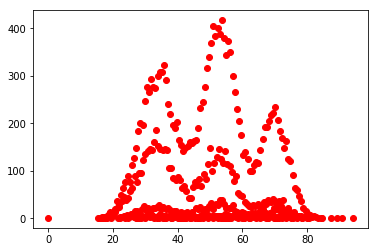

In [2]:
records, data, counter = fastq.analyze()
peaks=[35.76158940397351, 53.64238410596026, 70.19867549668875]
reads = fastq.get_reads(peaks, records, data)
data = {}
for read in reads:
    result_handle = NCBIWWW.qblast("blastn", "nt", read.seq, entrez_query='txid2[ORGN]', descriptions=1, alignments=1,hitlist_size=1)
    blast_record = NCBIXML.read(result_handle)
    for alignment in blast_record.alignments:
        org = alignment.title.split("|")[4]
        data[read.id] = org
        break
    print(read.id)

In [4]:
for id, name in data.items():
    print("{} : {}".format(id, name))

M00827:12:000000000-AEUNW:1:1101:19585:8123 :  Shigella boydii strain NCTC 9734 chromosome
M00827:12:000000000-AEUNW:1:1101:20008:11235 :  Escherichia coli strain DTU-1 chromosome, complete genome
M00827:12:000000000-AEUNW:1:1101:7922:8647 :  Thermus thermophilus HB8 genomic DNA, complete genome
M00827:12:000000000-AEUNW:1:1101:11761:10309 :  Staphylococcus aureus DNA, complete genome, strain: GN3
M00827:12:000000000-AEUNW:1:1101:11742:3950 :  Shigella dysenteriae strain CFSAN010956 chromosome, complete genome
M00827:12:000000000-AEUNW:1:1101:23128:3788 :  Shigella flexneri 2a strain ATCC 29903 chromosome, complete genome
M00827:12:000000000-AEUNW:1:1101:11245:8780 :  Thermus thermophilus HB8 genomic DNA, complete genome
M00827:12:000000000-AEUNW:1:1101:19588:16449 :  Staphylococcus aureus DNA, complete genome, strain: GN3
M00827:12:000000000-AEUNW:1:1101:7248:14390 :  Escherichia coli strain AR_0077 chromosome, complete genome
M00827:12:000000000-AEUNW:1:1101:5538:14656 :  Escherichia